# Milestone 2 - Independent Project

## Author - Aeden Jameson



## Instructions

1. Explore the dataset supported by charts and summary statistics

2. Identify a likely distribution for several of the features

3. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods

4. Compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods

5. Leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

## Problem

Prioritze the exploration of key relationships to predict the prices of houses in King County.

## Conclusion

The visual explorations below lend themselves to a few initial observations

* Higher prices are positively correlated with the square feet for living offered by a dwelling 

* Higher grade and higher priced homes are concentrated in particular neighborhoods. Similiarly 
  lower grade and lower prices homes are as well.
  
Note: Tried doing some line plots with median home prices month over month, but couldn't figure out the errors I was getting.

## Step 1: Explore the dataset supported by charts and summary statistics

Here's a data dictionary for reference

* **id**   - Unique ID for each home sold 
* **date** - Date of the home sale 
* **price** - Price of each home sold 
* **bedrooms** - Number of bedrooms 
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* **sqft_living** - Square footage of the apartments interior living space 
* **sqft_lot** - Square footage of the land space 
* **floors** - Number of floors 
* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not 
* **view** - An index from 0 to 4 of how good the view of the property was 
* **condition** - An index from 1 to 5 on the condition of the apartment, 
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 
* **sqft_above** - The square footage of the interior housing space that is above ground level 
* **sqft_basement** - The square footage of the interior housing space that is below ground level 
* **yr_built** - The year the house was initially built 
* **yr_renovated** - The year of the house’s last renovation 
* **zipcode** - What zipcode area the house is in 
* **lat** - Lattitude 
* **long** - Longitude 
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors 

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

def prepare(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"):
    data = pd.read_csv(fileName)

    # fix data types
    data['date'] = pd.to_datetime(data['date'])
    
    # 20699 of the 21613 rows don't have a value so we'll drop this column
    data.drop('yr_renovated', axis = 1, inplace = True)
    
    to_drop = data.loc[(data['bedrooms'] > 7) | 
                       (data['bedrooms'] == 0) |
                       (data['bathrooms'] > 5) | 
                       (data['bathrooms'] < 1) | 
                       (data['sqft_lot'] > 300000) | 
                       (data['price'] > 1000000) | 
                       (data['price'] < 100000) | 
                       (data['grade'] < 5) |
                       (data['grade'] == 12)].index
    data.drop(to_drop, inplace = True)
    
    return data

housing = prepare()

First, lets get a feel for the size and types of data we are dealing with so we can understand what kinds of visualizations might be helpful for uncovering relationships.

In [340]:
housing.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19966 entries, 0 to 21611
Data columns (total 20 columns):
id               19966 non-null int64
date             19966 non-null datetime64[ns]
price            19966 non-null float64
bedrooms         19966 non-null int64
bathrooms        19966 non-null float64
sqft_living      19966 non-null int64
sqft_lot         19966 non-null int64
floors           19966 non-null float64
waterfront       19966 non-null int64
view             19966 non-null int64
condition        19966 non-null int64
grade            19966 non-null int64
sqft_above       19966 non-null int64
sqft_basement    19966 non-null int64
yr_built         19966 non-null int64
zipcode          19966 non-null int64
lat              19966 non-null float64
long             19966 non-null float64
sqft_living15    19966 non-null int64
sqft_lot15       19966 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.2 MB


## Explore Key Numerical Variables

We'll start off identifying potential relationships amongst our numerical variables with Pearson's Correlation displayed as a heatmap.

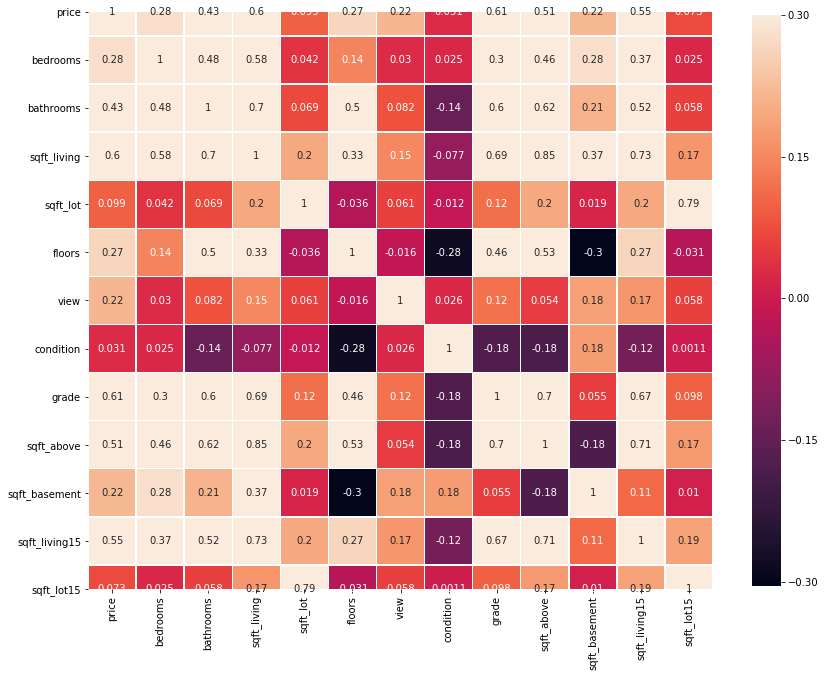

In [343]:
correlation_cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
_,ax=plt.subplots(figsize=(14,14))
sns.heatmap(housing[correlation_cols].corr(),vmax=.3,annot=True,square=True,linewidths=.5, cbar_kws={"shrink": .75});

**Observation**: We can see there are several variables moderately correlated with price that can service as starting points for our data analysis. Grade, sqft_living, sqft_above, sqft_living15, and finally bathrooms. 

#### Distributional Observations

Next examine the distributional properties of our numerical variables with histograms.

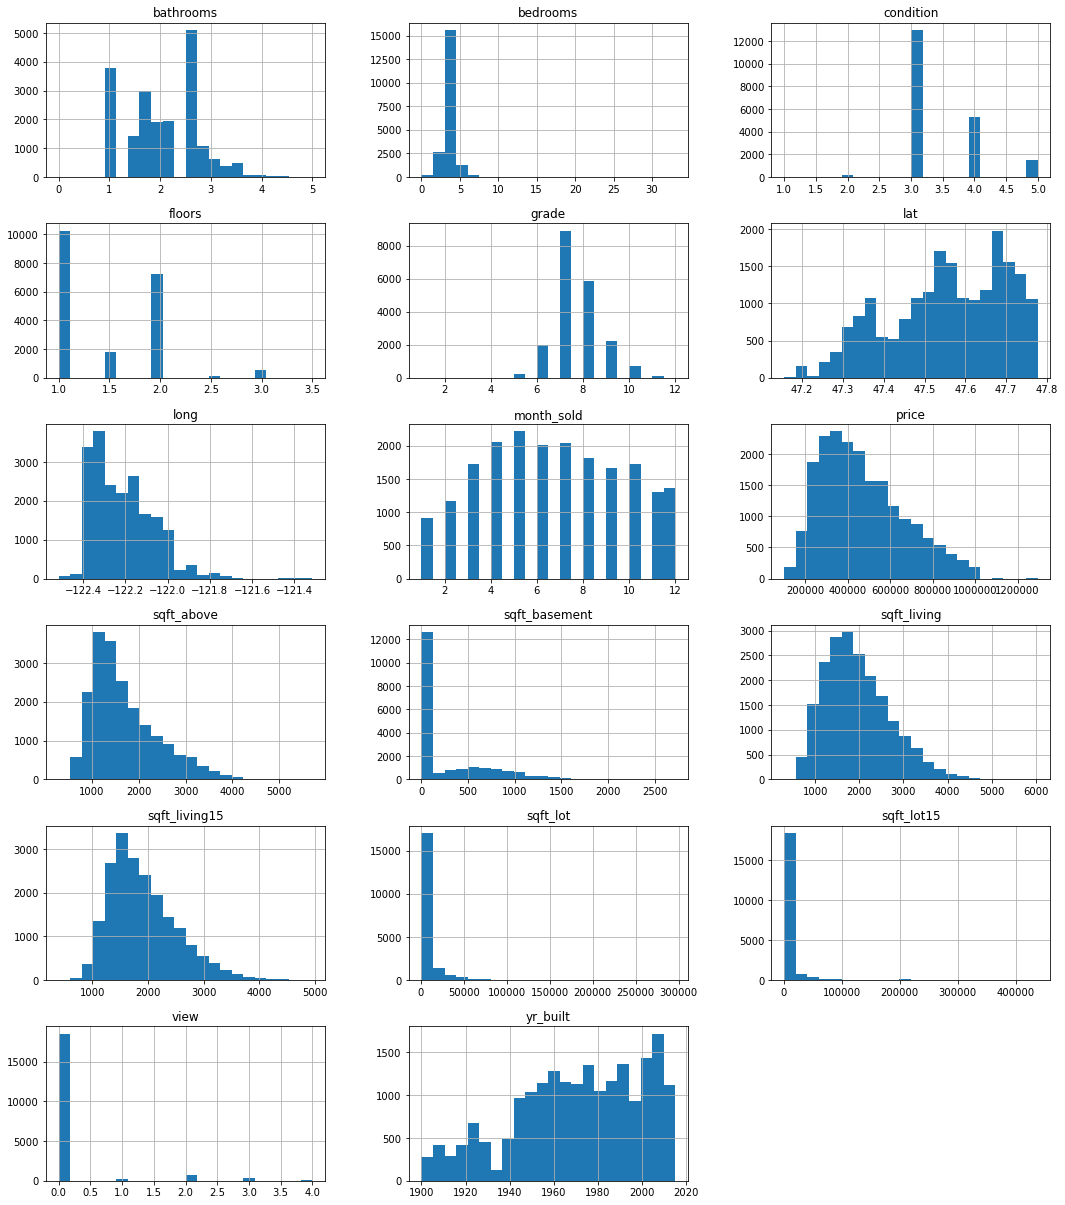

In [344]:
housing['month_sold'] = housing['date'].dt.month
columns_for_stats = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','sqft_living15','month_sold']


housing[columns_for_stats].hist(bins=22, figsize=(18, 25), layout=(7,3));

***Observations***

* Most houses are in reasonble condition and grade. 
* Peak selling season was around April, May, June and July
* The sale price, sqft_above, sqft_lot, sqft_living, sqft_living15 all skew right
* The lat and long histograms are multi-modal, which suggests, unsurprisingly, that there are a concentration
  of houses in certain neighborhood.
* Since the 70's housing construction has slowly increased and there has been various boom years since as well.
* sqft_basement, sqft_lot, sqft_lot15 skew left extremely hard, which suggests there is a large number bigger
  lots of all different sizes.
* Most homes, not surprisingly, don't have a good view.

#### Relationships

Now let's take an even closer look at potential relationships between price and non-continuous numeric variables using box plots.

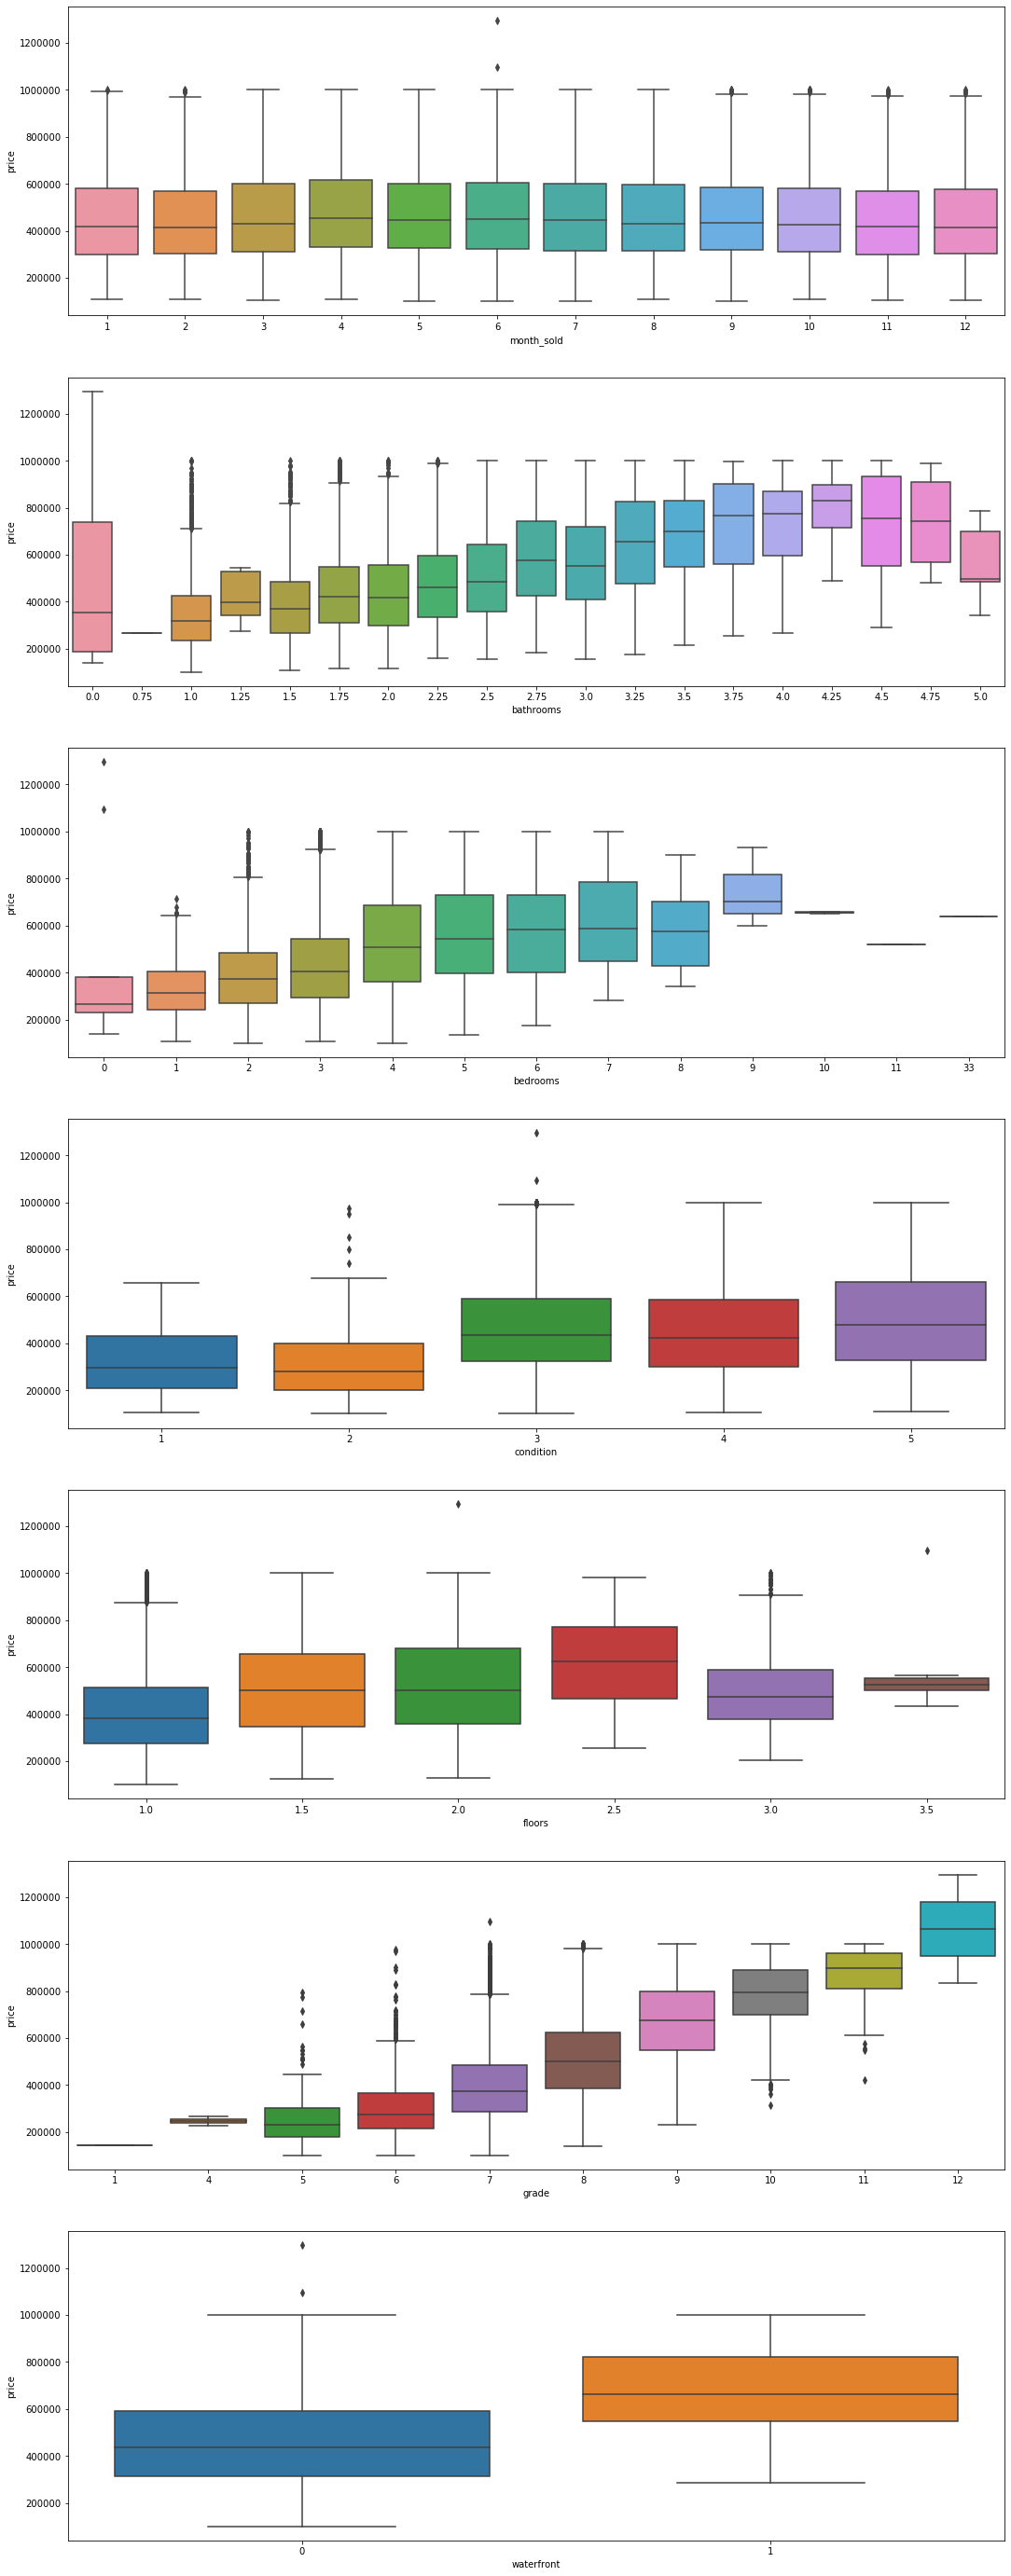

In [345]:
boxplot_fields = ['month_sold','bathrooms','bedrooms','condition','floors','grade','waterfront']
fig, ax = plt.subplots(7, 1, figsize=(18, 50))
for var, subplot in zip(boxplot_fields, ax.flatten()):
    sns.boxplot(x=var, y='price', data=housing, ax=subplot)

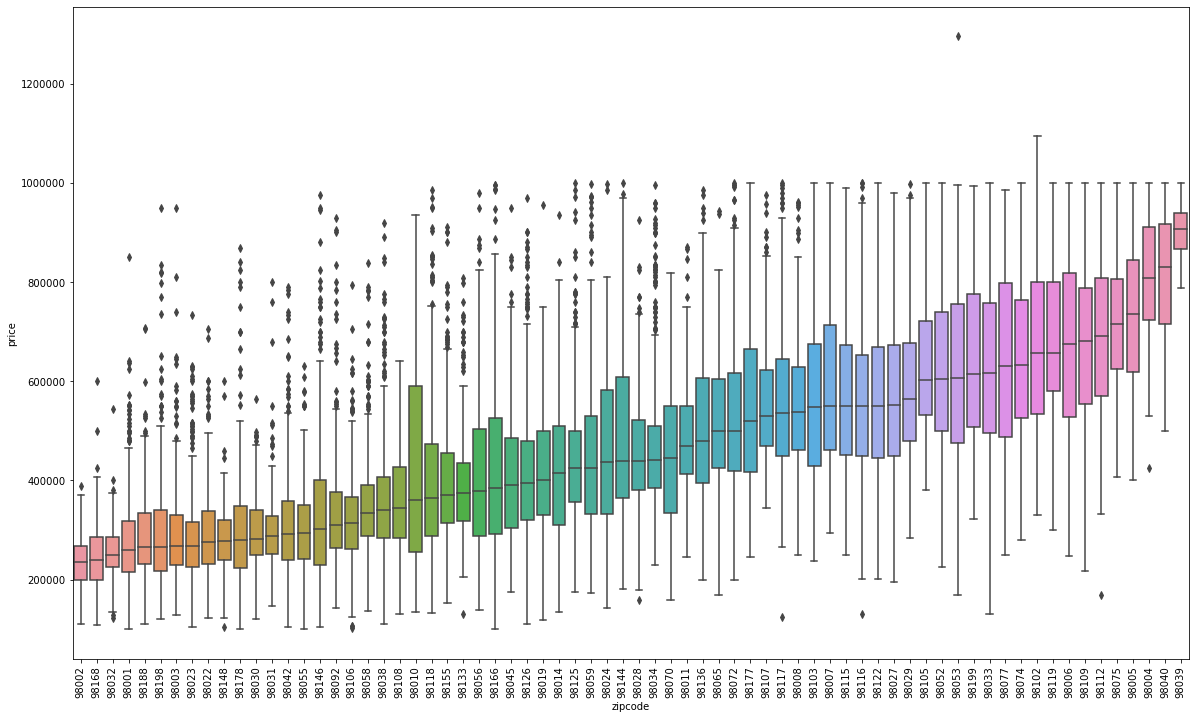

In [346]:
fig = plt.figure(figsize=(20, 12)) # define plot area
ax = fig.gca() # define axis 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sorted_nb = housing.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=housing['zipcode'], y=housing['price'], order=list(sorted_nb.index), ax=ax);

***Observations***

* Homesale prices are spread out evenly month over month with little variance.
* We observe an increase in the mean price as the number of bedrooms, bathrooms, condition or number of floors increase but questions
  about their significance will come later. 
* A strong relationship appears in the price vs grade plot. Higher grades command significantly higher prices. Also about every other
  interquantile range does not overlap.
* Waterfront properties sell for a higher price on average.
* Another strong relaitionship appears between price and zipcode. Some zipcodes command significantly higher prices. 

#### Continuous Variables

Now let's take a deeper look at our continuous variables.

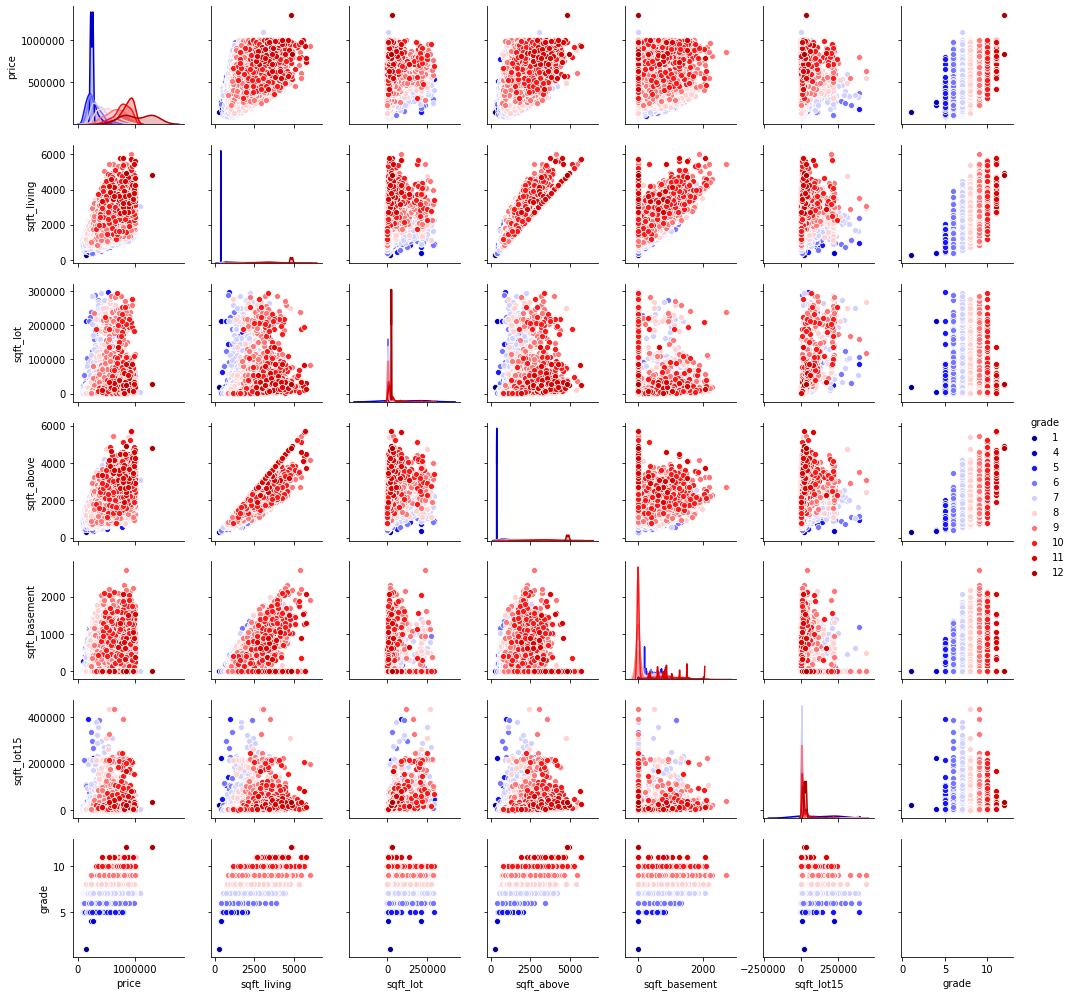

In [348]:
pair_plot_cols = ["price", "sqft_living", "sqft_lot",'sqft_above','sqft_basement','sqft_lot15','grade'] 
sns.pairplot(housing.loc[:, pair_plot_cols], hue='grade', 
             palette="seismic", diag_kind="kde", 
             height=2);

***Observations***
* I think strongest observation to make here with respect to understanding price is that it increases with sqft_living.
* sqft_above and sqft_basement have a moderate relationship with price

#### Understanding Price Along Multiple Dimensions

Now that we've identified strong relationships with price let's see how they relate among several dimensions

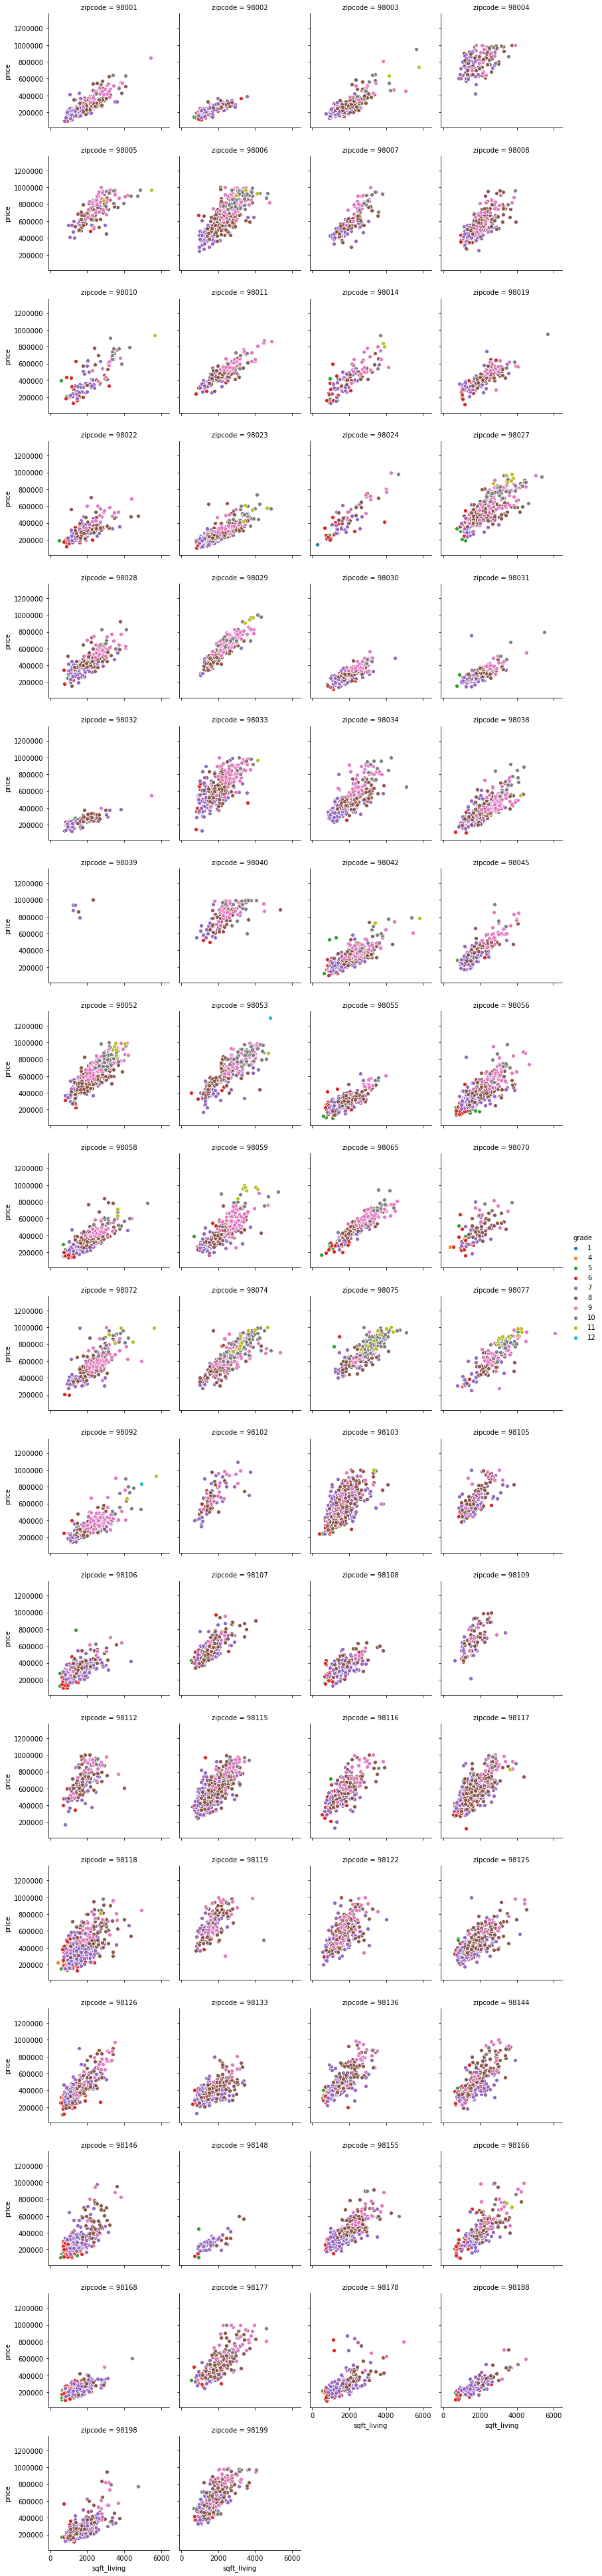

In [349]:
cond_plot = sns.FacetGrid(data=housing, col='zipcode', hue='grade', col_wrap=4, legend_out=True, margin_titles=True)
cond_plot.map(sns.scatterplot, 'sqft_living', 'price');
cond_plot.add_legend();

**Observation**: As the facet plot reveals sale prices increase within zipcode as both the sqft_living and grade increase.

*Note: 98039 doesn't have enough data points*

## Step 2: Identify a likely distribution for several of the features

In [350]:
# Setup code we'll use below
from scipy.stats import norm
from scipy import stats
from scipy.stats import kstest 
from sklearn.preprocessing import scale
import sklearn.preprocessing as sk


# Displays a histogram with it's theoretical pdf as well as a QQ-Plot, which we use
# for graphically evaluating the distributions of our features.
def qq_test(data, dist):
    plt.figure(figsize=(10, 6)).gca() 
    ax1 = plt.subplot(221) 
    res = stats.probplot(data, plot=ax1)
    ax2 = plt.subplot(222) 
    sns.distplot(data, fit=norm, bins=50, kde=False, ax=ax2);

def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

#### Feature: sqft_living

We'll start off with a Q-Q Plot

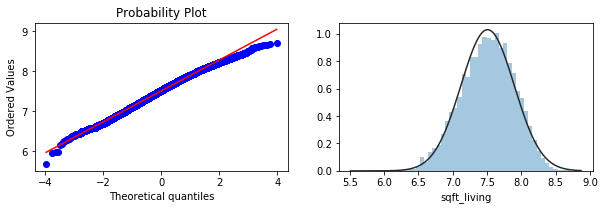

In [351]:
qq_test(np.log(housing['sqft_living']), norm)

As we can see in the plots sqft_living comes very close to a normal distribution. Now let's do a formal test in the form of the Kolmogorov-Smirnov Test.

Before performing the formal K-S test let's investigate the CDF's of the normalized sqft_living values and a theoretical standard normal since the test gives the maximum vertical distance between the respective CDF's. If visually they don't look quite close there would be no reason to bother with a formal test.

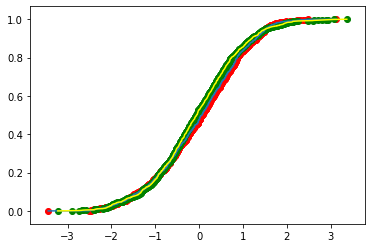

In [352]:
normalized_sqft_living = sk.scale(np.log(housing.sample(1000).loc[:,"sqft_living"]))
norm_dist = np.random.normal(size = 1000).tolist()
plot_cums(normalized_sqft_living, norm_dist) 


Does it get any better?! Now let's move on to a formal test.

In [353]:
ks_statisic, pvalue = kstest(normalized_sqft_living, 'norm')
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue));

KS-statistic = 0.03300618069108696
P-value = 0.22141399113705912


**Conclusion**: The K-S statistic is small and the p-value is greater than our cutoff of .05. It appears that we cannot reject null hypothesis and conclude sqft_living was drawn from a normal distribution.

#### Feature: sqft_above

Again we'll start off with a Q-Q Plot

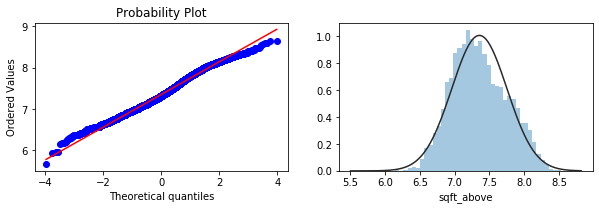

In [354]:
qq_test(np.log(housing['sqft_above']), norm)

As we can see in the plots sqft_above comes very close to a normal distribution. Now let's do a formal test in the form of the Kolmogorov-Smirnov Test.

Once again let's investigate the CDF's of the normalized sqft_above values and a theoretical standard normal.

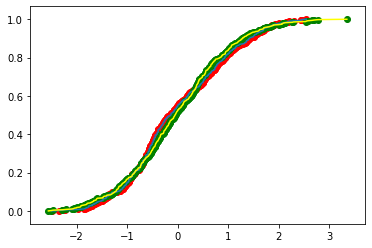

In [355]:
normalized_sqft_above = sk.scale(np.log(housing.sample(500).loc[:,"sqft_above"]))
norm_dist = np.random.normal(size = 500).tolist()
plot_cums(normalized_sqft_above, norm_dist) 

In [356]:
ks_statisic, pvalue = kstest(normalized_sqft_above, 'norm')
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue));

KS-statistic = 0.0770005439614403
P-value = 0.005028931869617684


**Conclusion**: The K-S statistic is small and the p-value is greater than our cutoff of .05. It appears that we cannot reject null hypothesis and conclude sqft_above was drawn from a normal distribution.

#### Features: grade, condition, bathrooms, bedrooms, floors

These features are ordinal data, type of categorical variable, and so would lend themselves to their respective categorical distributions.

## Step 3 & 4: Compute some basic summary statistics and their confidence intervals by both classical, bootstrap, and Bayesian methods

The summary statistics below will be focused on fields I believe may have a chance at a relationship with price.

**NOTE**: The instructions are quite unclear so I went off of this post. https://canvas.uw.edu/courses/1347202/discussion_topics/5101801

#### Classical Summary Statistics

In [386]:
cols_for_stats = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','sqft_living15']
housing[cols_for_stats].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15
count,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000
mean,3.327857,2.042560,1958.142342,12998.221426,1.473054,0.159171,3.405289,7.514124,1694.546780,263.595562,1910.248623
std,0.902395,0.694723,748.709618,25933.852798,0.537150,0.613242,0.644085,0.999963,707.414355,403.640748,600.484906
min,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000
25%,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1470.000000
50%,3.000000,2.000000,1846.000000,7500.000000,1.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1800.000000
75%,4.000000,2.500000,2410.000000,10202.000000,2.000000,0.000000,4.000000,8.000000,2080.000000,500.000000,2260.000000
max,33.000000,5.000000,6050.000000,295772.000000,3.500000,4.000000,5.000000,12.000000,5710.000000,2720.000000,4950.000000


In [390]:
print('Column                 SEM')
housing[cols_for_stats].sem()

Column                 SEM


bedrooms           0.006386
bathrooms          0.004917
sqft_living        5.298682
sqft_lot         183.536104
floors             0.003801
view               0.004340
condition          0.004558
grade              0.007077
sqft_above         5.006432
sqft_basement      2.856600
sqft_living15      4.249683
dtype: float64

#### Bootstrap Summary Statistics

**NOTE**: The instructions are quite unclear so I went off of this post. https://canvas.uw.edu/courses/1347202/discussion_topics/5101801

In [424]:

def bootstrap_mean(data, field):
    means = []
    for _ in range(100):
        sample = data.sample(frac=1.0, replace=True)
        means.append(sample[field].mean())
    return means

def print_mean_and_ci(data, p=5):
    upper_ci = np.percentile(data, 100-p/2.)
    lower_ci = np.percentile(data, p/2.)
    print('Bootstrap mean: %6.2f' %(data.mean()))
    print('The lower and upper CI = %6.2f %6.2f \n' %(lower_ci,upper_ci))

for f in cols_for_stats:
    print(f)
    boot = pd.Series(bootstrap_mean(housing, f))
    print_mean_and_ci(boot,p=10)



bedrooms
Bootstrap mean:   3.33
The lower and upper CI =   3.32   3.34 

bathrooms
Bootstrap mean:   2.04
The lower and upper CI =   2.03   2.05 

sqft_living
Bootstrap mean: 1958.37
The lower and upper CI = 1949.82 1967.33 

sqft_lot
Bootstrap mean: 13015.83
The lower and upper CI = 12738.05 13288.99 

floors
Bootstrap mean:   1.47
The lower and upper CI =   1.47   1.48 

view
Bootstrap mean:   0.16
The lower and upper CI =   0.15   0.17 

condition
Bootstrap mean:   3.41
The lower and upper CI =   3.40   3.41 

grade
Bootstrap mean:   7.51
The lower and upper CI =   7.50   7.52 

sqft_above
Bootstrap mean: 1694.90
The lower and upper CI = 1688.25 1702.06 

sqft_basement
Bootstrap mean: 263.70
The lower and upper CI = 258.85 268.59 

sqft_living15
Bootstrap mean: 1910.17
The lower and upper CI = 1903.61 1917.10 



#### Baysian Summary Statistics

**NOTE**: The instructions are quite unclear so I went off of this post. https://canvas.uw.edu/courses/1347202/discussion_topics/5101801

In [429]:
from scipy.stats import bayes_mvs

for f in cols_for_stats:
    print(f)
    # Uses Jeffrey’s prior
    stats = bayes_mvs(housing[f], .95)
    print(f'Mean: {stats[0][0]}, HDI: {stats[0][1][0]} - {stats[0][1][1]}')
    print(f'Variance: {stats[1][0]}, CI: {stats[1][1][0]} - {stats[1][1][1]}')
    print(f'Std Dev: {stats[2][0]}, CI: {stats[2][1][0]} - {stats[2][1][1]}')
    print('\n')
    

bedrooms
Mean: 3.3278573575077632, HDI: 3.3153406955433775 - 3.340374019472149
Variance: 0.8142765570346681, CI: 0.7983034468633943 - 0.8302496672059418
Std Dev: 0.902372737306856, CI: 0.8935221207540189 - 0.911223353859693


bathrooms
Mean: 2.0425598517479715, HDI: 2.0329237116658105 - 2.0521959918301325
Variance: 0.48261530932471003, CI: 0.4731481725889305 - 0.49208244606048956
Std Dev: 0.694705195982231, CI: 0.6878914159856714 - 0.7015189759787906


sqft_living
Mean: 1958.1423419813684, HDI: 1947.7573756305042 - 1968.5273083322327
Variance: 560538.0161005754, CI: 549542.3225502569 - 571533.709650894
Std Dev: 748.6908681829741, CI: 741.3475880538839 - 756.0341483120643


sqft_lot
Mean: 12998.221426424923, HDI: 12638.506281637869 - 13357.936571211978
Variance: 672531035.4396511, CI: 659338450.8934389 - 685723619.9858633
Std Dev: 25933.203339341846, CI: 25678.84632116742 - 26187.56035751627


floors
Mean: 1.4730541921266151, HDI: 1.4656036609960539 - 1.4805047232571764
Variance: 0.2885

## Step 5: Leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

In [441]:
#imports for this section
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

We're interesting in understanding the significance of grade with repspect to price.

**Null Hypothesis**: There is not significant difference in the mean price among all the grades

**Alternative Hypothesis**: At least one grade has a statistically different mean price.

In [467]:
g_five = housing.loc[housing['grade'] == 5]
g_six = housing.loc[housing['grade'] == 6]
g_seven = housing.loc[housing['grade'] == 7]
g_eight = housing.loc[housing['grade'] == 8]
g_nine = housing.loc[housing['grade'] == 9]
g_ten = housing.loc[housing['grade'] == 10]
g_eleven = housing.loc[housing['grade'] == 11]

f_statistic, p_value = ss.f_oneway(
    np.log10(g_five.loc[:,'price']), 
    np.log10(g_six.loc[:,'price']), 
    np.log10(g_seven.loc[:,'price']), 
    np.log10(g_eight.loc[:,'price']), 
    np.log10(g_nine.loc[:,'price']),
    np.log10(g_ten.loc[:,'price']),
    np.log10(g_eleven.loc[:,'price']))

print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 1930.0954238345525
P-value = 0.0


The F-Statistic is fairly large and the p-value is well 0. We can reject the null hypothesis that the 4 variables have the same mean. These treatment groups are unlikely to have arisen from the null distribution that all treatments had no effect. 